🚀 IMPORTS

In [249]:
import numpy as np  #
import pandas as pd  #
import matplotlib.pyplot as plt  #
import seaborn as sns  #

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
pd.set_option("display.float_format", lambda x: "%.3f" %x)
import warnings

🚀 GATHERİNG DATA

The aim of the project is to estimate the approximate cost of a person's
health insurance based on the given variables.

In [182]:
pd.set_option("display.float_format", lambda x: "%.3f" %x)
df_ = pd.read_csv("/content/insurance.csv")

In [183]:
df = df_.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


🚀 EXPLORATORY DATA ANALTSİS & PREPROCESSİNG THE DATA

In [184]:
df.shape

(1338, 7)

In [185]:
df.size

9366

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.000,39.207,14.050,18.000,27.000,39.000,51.000,64.000
bmi,1338.000,30.663,6.098,15.960,26.296,30.400,34.694,53.130
children,1338.000,1.095,1.205,0.000,0.000,1.000,2.000,5.000
charges,1338.000,13270.422,12110.011,1121.874,4740.287,9382.033,16639.913,63770.428


In [188]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

🚀    Convert object to categorical obj values

In [189]:
obj_col = df.select_dtypes("object").columns
obj_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [190]:
#obj_col = np.append(obj_col, "children")
#obj_col

In [191]:
for col in obj_col:
  df[col] = df[col].astype("category")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [192]:
# Examine the distribution of Bmi (Body Mass Index)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [193]:
df.groupby(by= ["sex"]).agg({"bmi": "mean"})

,bmi
sex,
female,30.378
male,30.943


In [194]:
df.groupby(by= ["children"]).agg({"bmi": "mean"})

,bmi
children,
0,30.550
1,30.623
2,30.978
3,30.684
4,31.391
5,29.605


In [195]:
df.groupby(by= ["sex"]).agg({"bmi": "mean", "charges": "mean"})

,bmi,charges
sex,,
female,30.378,12569.579
male,30.943,13956.751


In [196]:
  # Examine the relationship between “smoker” and “charges”
df.groupby(by=["smoker"]).agg({"charges": "mean"})

,charges
smoker,
no,8434.268
yes,32050.232


In [197]:
 #Examine the relationship between “smoker” and “region”.
df.groupby(by=["region", "smoker"]).agg({"smoker": "count"})

smoker
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

In [198]:
# Examine the relationship between “bmi” and “sex”.
df.groupby(by=["sex"]).agg({"bmi": "mean"})

,bmi
sex,
female,30.378
male,30.943


In [199]:
# Find the "region" with the most "children"
df.groupby(by= ["region", "children"]).agg({"region": "count"}).sort_values(by="children", ascending= False)[:3]

# veri tipini değiştirdiğim için bir sonraki  kısımda bunu hesaplayabildim ( verinin asıl haliyle)

,,region
region,children,
southwest,5,8
southeast,5,6
northwest,5,1


In [200]:
df_.groupby(by= ["region"]).agg({"children": "sum"}).sort_values(by="children", ascending= False)[:3]


,children
region,
southeast,382
northwest,373
southwest,371


In [201]:
# Examine the relationship between “age” and “bmi"

df.groupby(by=["age"]).agg({"bmi": "mean"})

,bmi
age,
18,31.326
19,28.597
20,30.633
21,28.186
22,31.088
23,31.454
24,29.143
25,29.694
26,29.429


In [202]:
#  the relationship between “bmi” and “children”.
df.groupby(by=["children"]).agg({"bmi": "mean"})

,bmi
children,
0,30.550
1,30.623
2,30.978
3,30.684
4,31.391
5,29.605


🚀 OUTLİERS DETECTİON

In [203]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [204]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.000,39.207,14.050,18.000,27.000,39.000,51.000,64.000
bmi,1338.000,30.663,6.098,15.960,26.296,30.400,34.694,53.130
children,1338.000,1.095,1.205,0.000,0.000,1.000,2.000,5.000
charges,1338.000,13270.422,12110.011,1121.874,4740.287,9382.033,16639.913,63770.428


In [205]:
# number of children age 18
df[df["age"] ==18].sort_values(by="children",ascending=False)[:5]

,age,sex,bmi,children,smoker,region,charges
1095,18,female,31.350,4,no,northeast,4561.189
369,18,male,30.400,3,no,northeast,3481.868
1204,18,female,27.280,3,yes,southeast,18223.451
46,18,female,38.665,2,no,northeast,3393.356
938,18,male,26.180,2,no,southeast,2304.002


In [206]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car: {len(cat_but_car)}')
  print(f'num_but_cat: {len(num_but_cat)}')

  return cat_cols, cat_but_car, num_cols

In [207]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 1338
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 4


In [208]:
cat_cols

['sex', 'children', 'smoker', 'region']

In [209]:
num_cols

['age', 'bmi', 'charges']

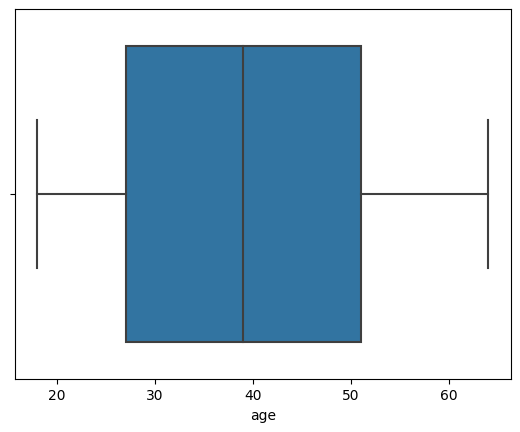

In [210]:
sns.boxplot(x=df["age"])
plt.show()

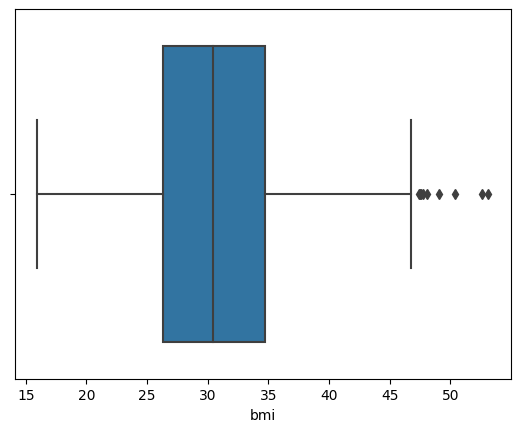

In [211]:
sns.boxplot(x=df["bmi"])
plt.show()   # outliers

In [212]:
num_col = [col for col in df.columns if df[col].dtypes != "O"]
num_col

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [213]:
num_col = [col for col in num_col if col not in obj_col]
num_col

['age', 'bmi', 'children', 'charges']

In [214]:
df[num_col].corr()

# age * charges 0,299

,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000


In [215]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [216]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [217]:
for col in num_col:
    print(col, check_outlier(df, col))

# for bmi has outliers

age False
bmi True
children False
charges True


<ipython-input-216-4ebe853b1474>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
<ipython-input-216-4ebe853b1474>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
<ipython-input-216-4ebe853b1474>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_onl

In [218]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [219]:
for col in num_cols:
    if col != "charges":
        replace_with_thresholds(df,col)

In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.000,39.207,14.050,18.000,27.000,39.000,51.000,64.000
bmi,1338.000,30.650,6.057,15.960,26.296,30.400,34.694,47.290
children,1338.000,1.095,1.205,0.000,0.000,1.000,2.000,5.000
charges,1338.000,13270.422,12110.011,1121.874,4740.287,9382.033,16639.913,63770.428


🚀 Data Preprocessing

  Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.

In [221]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [223]:
cat_cols

['sex', 'children', 'smoker', 'region']

In [224]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [225]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [226]:
## binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

In [231]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [232]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [233]:
df.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.924,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.552,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.462,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.471,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.855,1,0,0,0,0,0,0,1,0,0


🚀 MODELLEME

In [234]:
dff = df.copy()

In [235]:
#  Train ve Test verisini ayırınız.
y = dff["charges"]
X = dff.drop(["charges"], axis=1) # bunların dışındakiler bağımsız

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [247]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]

In [250]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=7, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")


# CHOOSE GMB

RMSE: 6074.4426 (LR) 
RMSE: 10922.6773 (KNN) 
RMSE: 6676.3997 (CART) 
RMSE: 4947.6544 (RF) 
RMSE: 4557.5915 (GBM) 
RMSE: 5288.2613 (XGBoost) 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 11
[LightGBM] [Info] Start training from score 13256.438439
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1147, number of used features: 11
[LightGBM] [Info] Start training from score 13069.140618
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 se

In [251]:
X.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0


In [252]:
y.head()

0   16884.924
1    1725.552
2    4449.462
3   21984.471
4    3866.855
Name: charges, dtype: float64

In [253]:
# gradient boosting model

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

GradientBoostingRegressor()

In [254]:
print("Accuracy of train set:", gbm.score(X_train, y_train))

Accuracy of train set: 0.8969592527500707


In [255]:
print("Accuracy of test set:", gbm.score(X_test, y_test))

Accuracy of test set: 0.8777198949415953


🚀 Hyper-parameter Optimization

In [256]:
gbm_model = GradientBoostingRegressor(random_state =1)

rmse = np.mean(np.sqrt(-cross_val_score(gbm_model, X, y, cv=3, scoring="neg_mean_squared_error")))

gbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1000],

             }

gbm_gs_best = GridSearchCV(gbm_model,
                            gbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

final_model = gbm_model.set_params(**gbm_gs_best.best_params_).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [257]:
gbm_gs_best.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [258]:
rmse

4513.439564946975

In [259]:
final_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#  before  RMSE: 4568.124 (GBM)        after    4513.439564946975

In [260]:
gbm_model.score(X_test, y_test)


#  before optimization => Accuracy of test set:      0.8559545814726655

# after  optimization => Accuracy of test set :      0.8950666897995935

0.8950666897995935

In [261]:
final_model.score(X_test,y_test)

0.8950666897995935